<a href="https://colab.research.google.com/github/regmibishal1/Data606/blob/main/Homework6/DATA606_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
## 1 point
## read the csv file into a dataframe and show the first 5 rows
diab_df = pd.read_csv("/content/diabetes.csv")
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
y = diab_df['Outcome']
X = diab_df.loc[:, diab_df.columns != 'Outcome']

# Checking on X and y
# display(y.head())
# display(X.head())

## USe LogisticRegression to fit the data and print out the intercept and the coefficients
LRG = LogisticRegression(random_state = 0, max_iter=1000).fit(X, y)
print("Intercept: %f" % ( LRG.intercept_))
print("Coefficients: " + str(LRG.coef_))

Intercept: -8.364487
Coefficients: [[ 1.22504795e-01  3.51112854e-02 -1.32989843e-02  7.79015138e-04
  -1.17339258e-03  8.96471193e-02  8.67318608e-01  1.49732914e-02]]


In [4]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40381811), 'w1': array(0.12319259), 'w2': array(0.03516101), 'w3': array(-0.01329351), 'w4': array(0.00062072), 'w5': array(-0.00119151), 'w6': array(0.08968112), 'w7': array(0.94539065), 'w8': array(0.0148632)}


1. Explain what the code is doing: </br>
    This code basically did a linear regression by simulating it. It started by creating nine stochastic random varaibles with normal prior distribution with mean of zero and standard deviation of 100. Of the nine varaibles, eight are for each of the columns and then one (w0) is for the intercept. Once the priors are defined, then the expected value specifying a linear relationship is calculated. The the expected values are put through the inverse of the logit function (1/ (1 + exp(-x))) or the sigmoid funtion. Once that is done then the likelihood is calculated using a bernoulli likelihood distribution. With that we get the data likelihood of the model. Finally we get the posterior estimates for the varaibles in the model by using find_MAP also known as find maximum a posterior. So, we find the maximum a posterior estimate for the model. These should be to the values calculated in the first section and they are fairly close.

2. What are the prior probabilities of the intercept and coefficients? </br>
    The prior probabilities of the intercept and coefficients are from the normal distribution with a mean of zero and a standard deviation of 100.

3. Which likelihood distribution has been used? </br>
    The bernoulli distribution was used for the likelihood.

4. What does pm.invlogit(linreg) mean? </br>
    pm.invlogit(linreg) is putting the expected value calculated using the linear equation through the sigmoid function.

5. What is map_est? </br>
    map_est calculates the posterior or the predicted coffecient for each variables w0 to w8. So for each of the variables, the mode of the posterior was calculated.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Only 400 samples in chain.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 2 chains for 1_000 tune and 400 draw iterations (2_000 + 800 draws total) took 22 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,-5.473,2.391,-8.389,-2.715,1.664,1.400,3.0,20.0,2.12
w1,0.117,0.029,0.072,0.164,0.005,0.004,29.0,75.0,1.05
w2,0.015,0.015,-0.000,0.031,0.010,0.009,2.0,2.0,2.59
w3,-0.007,0.009,-0.020,0.001,0.006,0.005,3.0,23.0,2.48
w4,0.005,0.006,-0.004,0.015,0.002,0.002,6.0,28.0,1.35
w5,-0.000,0.001,-0.002,0.001,0.001,0.000,3.0,13.0,2.38
w6,0.053,0.045,0.009,0.111,0.031,0.026,2.0,2.0,3.05
w7,0.968,0.375,0.410,1.807,0.170,0.129,5.0,43.0,1.36
w8,0.022,0.007,0.012,0.032,0.003,0.002,6.0,23.0,1.28


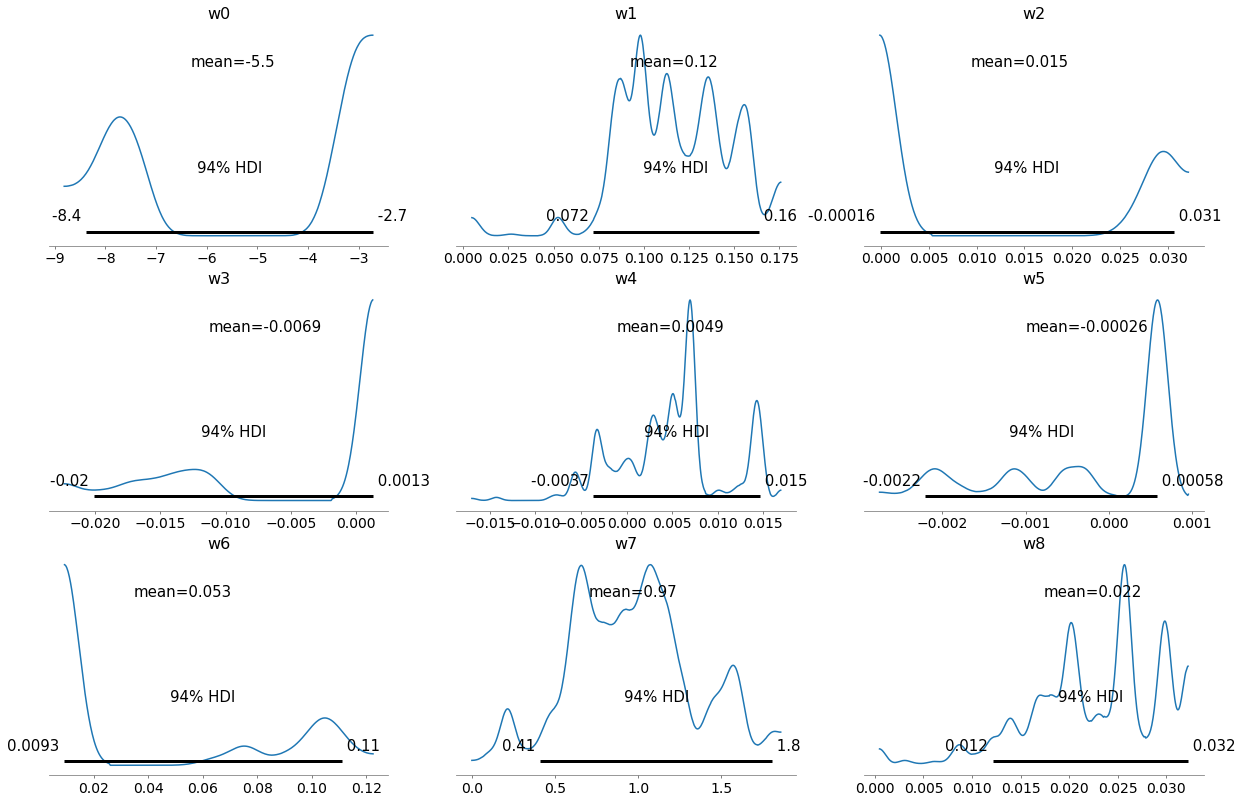

In [7]:
## 2 points

with logreg_model:
  ## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
  trace = pm.sample(400, step=pm.Metropolis())

  ## Explain the output of the plot 
  az.plot_posterior(trace)

  ## Using summary to get more details
  display(az.summary(trace))

The output of the plots allows us to analyze the posterior.
